# checking feature importance

In [1]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',2000)
pd.set_option('display.max_columns', 2000)

In [2]:
directory = "labeled_data\\"
data = pd.read_csv(directory+'cleaned_topic_1.csv')
data['followers'] = np.log1p(data["followers"])
data["listed_count"] = np.log1p(data["listed_count"])
data['Avg_favorites_per_post'] = np.log1p(data["Avg_favorites_per_post"])
data['listed_follower_ratio'] = np.log1p(data["listed_follower_ratio"])
data['follower-following_ratio'] =  np.log1p(data["follower-following_ratio"])

Le = LabelEncoder()
data['Tweet_Type'] = Le.fit_transform(data.tweet_type)
data = data.drop(['tweet_type','trends'],axis = 1)

data = data.reindex(columns=['followers','listed_count','Avg_favorites_per_post','follower-following_ratio','listed_follower_ratio','Tweet_Type','friends','target'])
X = data.iloc[ : , :6]
y = data.target

#fs = SelectKBest(chi2, k = 'all')
fs = SelectKBest(mutual_info_classif,k = 'all')
fs.fit(X ,y)

df_scores = pd.DataFrame(fs.scores_)
df_columns = pd.DataFrame(X.columns)
fs_imp = pd.concat([df_columns,df_scores], axis = 1)
fs_imp.columns = ['Feature', 'Score']

fs_imp = fs_imp.sort_values(by = 'Score', ascending=False, ignore_index=True)


print(fs_imp)

                    Feature     Score
0                 followers  0.163370
1  follower-following_ratio  0.133032
2              listed_count  0.128535
3    Avg_favorites_per_post  0.101915
4     listed_follower_ratio  0.096674
5                Tweet_Type  0.007866


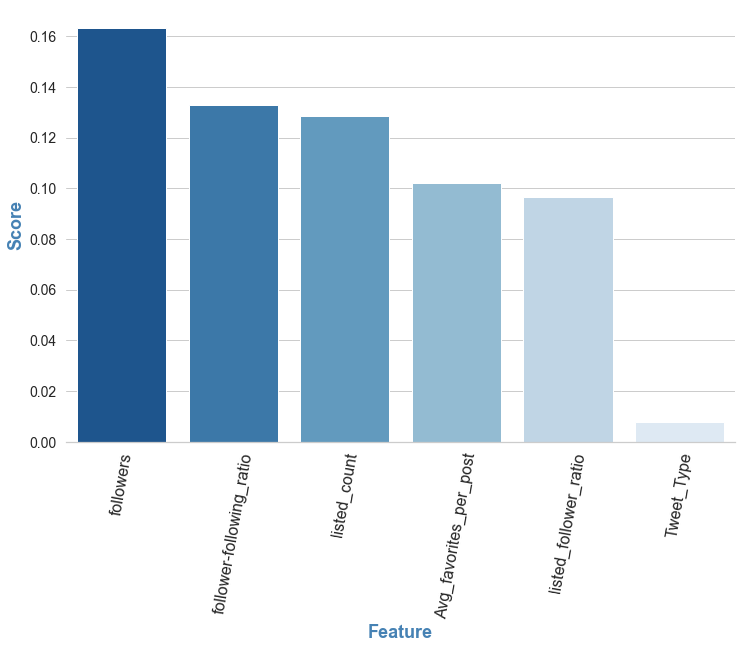

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
folder = "figures\\"
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.color_palette("RdBu", 10)
ax = sns.barplot(x = "Feature", y = "Score",data=fs_imp, order= fs_imp.sort_values('Score',ascending=False).Feature, palette = 'Blues_r')
ax.set_xlabel("Feature", fontsize = 18, color = 'steelblue', fontweight = 'bold')
ax.set_ylabel('Score',fontsize = 18, color = 'steelblue',fontweight = 'bold')
plt.xticks(rotation=80,size=16)
plt.yticks(size=14)
sns.despine(left=True);
plt.savefig(folder+"feature_imp.png",bbox_inches='tight')
plt.show()